## CH05 Q08
## We will now perform cross-validation on a simulated data set.
## (a) Generate a simulated data set as follows:
### rng = np.random.default_rng(1)
### x = rng.normal(size=100)
### y = x- 2 * x**2 + rng.normal(size=100)
## In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [2]:
import numpy as np


rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)


- n is the number of observations, which is 100.
- p is the number of predictors, which is 1.
### $y$=$x$-$2x^2$+$\epsilon$

##  (b) Create a scatterplot of X against Y . Comment on what you find.

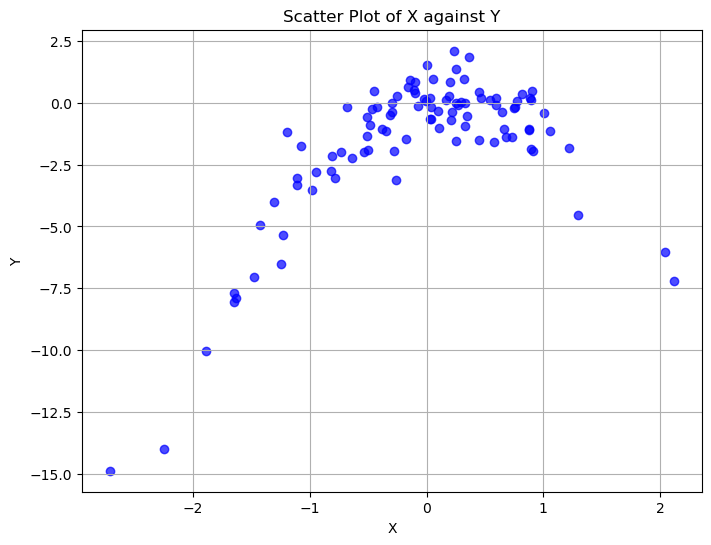

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.title("Scatter Plot of X against Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

##  (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
- i. $Y$ =$\beta_0$+$\beta_1$ * $X$+$\epsilon$ 
- ii. $Y$ = $\beta_0$+$\beta_1$ * $X$+$\beta_2$ * $X^2$+$\epsilon$
- iii. $Y$ = $\beta_0$+$\beta_1$ * $X$+$\beta_2$ * $X^2$+$\beta_3$ * $X^3$+ $\epsilon$
- iv. $Y$ = $\beta_0$+$\beta_1$ * $X$+$\beta_2$ * $X^2$+$\beta_3$ * $X^3$+$\beta_4$ * $X^4$+ $\epsilon$
## Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Create data frame with both X and Y
data = pd.DataFrame({'X': x, 'Y': y})

# Set up Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()

# Prepare models with increasing polynomial degrees for X
degrees = [1, 2, 3, 4]
errors = []

# Loop through each polynomial degree and perform LOOCV
for degree in degrees:
    # Generate polynomial features for the current degree
    X_poly = np.vstack([x**i for i in range(1, degree + 1)]).T
    
    # Store LOOCV errors for the current model
    model_errors = []

    # Perform LOOCV
    for train_index, test_index in loo.split(X_poly):
        # Split data into train and test sets
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit linear regression model
        model = LinearRegression().fit(X_train, y_train)
        
        # Predict and calculate error
        y_pred = model.predict(X_test)
        model_errors.append(mean_squared_error(y_test, y_pred))
    
    # Average error across all LOOCV iterations
    avg_error = np.mean(model_errors)
    errors.append(avg_error)

# Print LOOCV errors for each model
errors


[6.633029839181983, 1.122936856341968, 1.301796548935886, 1.332394269417932]

##  (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Set a different random seed for data generation
rng = np.random.default_rng(42)

# Generate new data with the new random seed
x_new = rng.normal(size=100)
y_new = x_new - 2 * x_new**2 + rng.normal(size=100)

# Create data frame with new X and Y values
data_new = pd.DataFrame({'X': x_new, 'Y': y_new})

# Set up Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()

# Degrees of polynomial models to test
degrees = [1, 2, 3, 4]
errors_new = []

# Loop through each polynomial degree and perform LOOCV with new data
for degree in degrees:
    # Generate polynomial features for the current degree with new data
    X_poly_new = np.vstack([x_new**i for i in range(1, degree + 1)]).T
    
    # Store LOOCV errors for the current model with new data
    model_errors_new = []

    # Perform LOOCV
    for train_index, test_index in loo.split(X_poly_new):
        # Split new data into train and test sets
        X_train, X_test = X_poly_new[train_index], X_poly_new[test_index]
        y_train, y_test = y_new[train_index], y_new[test_index]
        
        # Fit linear regression model on new data
        model_new = LinearRegression().fit(X_train, y_train)
        
        # Predict and calculate error on new data
        y_pred_new = model_new.predict(X_test)
        model_errors_new.append(mean_squared_error(y_test, y_pred_new))
    
    # Average error across all LOOCV iterations for new data
    avg_error_new = np.mean(model_errors_new)
    errors_new.append(avg_error_new)

# Print LOOCV errors for each model with new data
print(errors_new,'\n')
print("The results show that changing the seed affects the LOOCV errors slightly, but Model ii still has the lowest error, indicating a quadratic model fits the data well.") 

[4.2518828656027745, 0.9639984632709345, 0.9912711879229298, 1.0181801043809169] 

The results show that changing the seed affects the LOOCV errors slightly, but Model ii still has the lowest error, indicating a quadratic model fits the data well.


##  (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.


### In (c), the model with the smallest LOOCV error was: 
### Model ii. $Y$ = $\beta_0$+$\beta_1$ * $X$+$\beta_2$ * $X^2$+$\epsilon$
### This result aligns with expectations. Given the data-generating process , the true relationship between  $X$ and $Y$ is a quadratic function with a squared term $X^2$. Therefore, a model including $X^2$ should be most effective at capturing the true structure of the data. Adding higher-order terms introduces additional complexity but does not improve the fit significantly, as these terms are not part of the underlying relationship.

## (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [13]:
import numpy as np
import statsmodels.api as sm

# Set up random number generator
rng = np.random.default_rng(1)

# Generate data
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# Define degrees for models
degrees = [1, 2, 3, 4]

# Function to fit a model and extract p-values for coefficients
def fit_model_and_get_pvalues(x, y, degree):
    # Generate polynomial features
    X_poly = np.vstack([x**i for i in range(1, degree + 1)]).T
    X_poly = sm.add_constant(X_poly)  # Add intercept term

    # Fit model using OLS (Ordinary Least Squares) and get summary
    model = sm.OLS(y, X_poly).fit()
    return model.pvalues

# Fit each model from (c) and extract p-values for coefficient estimates
pvalues_list = [fit_model_and_get_pvalues(x, y, degree) for degree in degrees]

# Display p-values for each model
for i, pvalues in enumerate(pvalues_list, 1):
    print(f"Model {i} (degree {i}): p-values = {pvalues}")


Model 1 (degree 1): p-values = [4.40962098e-08 1.03650624e-09]
Model 2 (degree 2): p-values = [5.42824291e-01 1.49491271e-11 1.34006777e-39]
Model 3 (degree 3): p-values = [6.34501501e-01 4.44851557e-08 3.96890554e-37 2.87201831e-01]
Model 4 (degree 4): p-values = [4.59605334e-01 2.59129629e-05 2.39602593e-19 6.42490980e-01
 2.31066104e-02]


### In Model ii, the p-values for the $X$ and $X^2$ coefficients are highly significant, aligning with the fact that the true relationship includes an  $X^2$ term. This model also had the lowest LOOCV error, supporting the idea that it best captures the true underlying relationship.
### Models iii and iv include additional terms ($X^3$ and $X^4$), but these terms have higher p-values, indicating they are not statistically significant. This supports the cross-validation conclusion that these extra terms do not improve the model's accuracy.

## CH05 Q09 
## We will now consider the Boston housing data set, from the ISLP library.
## (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat{\mu}$.


In [16]:
import numpy as np

# Load the Boston dataset from the ISLP library
boston = pd.read_csv('Boston.csv')

# Calculate the estimate for the population mean of medv
mu_hat = np.mean(boston['medv'])
print(f"Estimated population mean of medv: {mu_hat}")


Estimated population mean of medv: 22.532806324110677


##  (b) Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result. 
## Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [18]:
import numpy as np

# Calculate the sample size (number of observations)
n = len(boston['medv'])

# Calculate the sample standard deviation of medv
std_dev = np.std(boston['medv'], ddof=1)  # ddof=1 for sample standard deviation

# Calculate the standard error of the mean
se_mu_hat = std_dev / np.sqrt(n)
print(f"Standard error of the population mean estimate : {se_mu_hat}")


Standard error of the population mean estimate : 0.4088611474975351


## (c) Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

In [20]:
import numpy as np

# Set the number of bootstrap samples
num_bootstrap_samples = 1000

# Generate bootstrap samples and calculate their means
bootstrap_means = [
    np.mean(np.random.choice(boston['medv'], size=len(boston['medv']), replace=True))
    for _ in range(num_bootstrap_samples)
]

# Calculate the standard error of the bootstrap sample means
se_mu_hat_bootstrap = np.std(bootstrap_means, ddof=1)
print(f"Bootstrap standard error of the population mean estimate: {se_mu_hat_bootstrap}")


Bootstrap standard error of the population mean estimate: 0.413125408103402


## (d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results obtained by using Boston['medv'].std() and the two standar error rule (3.9).
## Hint: You can approximate a 95% confidence interval using the formula [$\hat{\mu}$-2SE($\hat{\mu}$), $\hat{\mu}$ + 2SE($\hat{\mu}$)].

In [22]:
# Calculate the sample mean of medv
mu_hat = np.mean(boston['medv'])

# Method 1: 95% CI using the bootstrap standard error
ci_bootstrap = (mu_hat - 2 * se_mu_hat_bootstrap, mu_hat + 2 * se_mu_hat_bootstrap)
print(f"95% CI using bootstrap standard error: {ci_bootstrap}")

# Method 2: 95% CI using the two-standard-error rule with sample standard error from part (b)
ci_two_se = (mu_hat - 2 * se_mu_hat, mu_hat + 2 * se_mu_hat)
print(f"95% CI using two-standard-error rule: {ci_two_se}")


95% CI using bootstrap standard error: (21.70655550790387, 23.359057140317482)
95% CI using two-standard-error rule: (21.715084029115605, 23.35052861910575)


## (e) Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median value of medv in the population.

In [24]:
# Calculate the estimate for the population median of medv
mu_med_hat = np.median(boston['medv'])
print(f"Estimated population median of medv : {mu_med_hat}")


Estimated population median of medv : 21.2


## (f) We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [26]:
# Set the number of bootstrap samples
num_bootstrap_samples = 1000

# Generate bootstrap samples and calculate their medians
bootstrap_medians = [
    np.median(np.random.choice(boston['medv'], size=len(boston['medv']), replace=True))
    for _ in range(num_bootstrap_samples)
]

# Calculate the standard error of the bootstrap sample medians
se_mu_med_hat_bootstrap = np.std(bootstrap_medians, ddof=1)
print(f"Bootstrap standard error of the population median estimate : {se_mu_med_hat_bootstrap}")


Bootstrap standard error of the population median estimate : 0.37841506042698364


##  (g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$.(You can use the np.percentile() function.)

In [28]:
# Calculate the 10th percentile of medv
mu_0_1_hat = np.percentile(boston['medv'], 10)
print(f"Estimated 10th percentile of medv (μ̂_0.1): {mu_0_1_hat}")


Estimated 10th percentile of medv (μ̂_0.1): 12.75


## (h) Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

In [30]:
# Set the number of bootstrap samples
num_bootstrap_samples = 1000

# Generate bootstrap samples and calculate their 10th percentiles
bootstrap_10th_percentiles = [
    np.percentile(np.random.choice(boston['medv'], size=len(boston['medv']), replace=True), 10)
    for _ in range(num_bootstrap_samples)
]

# Calculate the standard error of the bootstrap sample 10th percentiles
se_mu_0_1_hat_bootstrap = np.std(bootstrap_10th_percentiles, ddof=1)
print(f"Bootstrap standard error of the 10th percentile estimate (SE_μ̂_0.1): {se_mu_0_1_hat_bootstrap}")


Bootstrap standard error of the 10th percentile estimate (SE_μ̂_0.1): 0.5140833314470249


### Robustness: The bootstrap standard error will give us an estimate of how much the 10th percentile would vary if we repeatedly drew new samples from the population. This method is particularly useful because the 10th percentile, like the median, is a non-parametric statistic and might not follow a straightforward distribution, making it hard to calculate its standard error analytically.
### Precision: A smaller standard error indicates that the 10th percentile estimate is more reliable, while a larger standard error suggests more variability in the estimates across different samples.